In [258]:
import pandas as pd

hn = pd.read_csv("hero-network.csv")
e = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

import re

def cleaning(string):
    #Pattern for backlash in last position
    pattern = "\/$" 
    newS = re.sub(pattern, "", string)

    #pattern for space in last position
    pattern =  " $"
    newS = re.sub(pattern, "", newS)
    
    return newS

#Extract all the names from the edges
vecHeroRight = e.hero.unique()
cleanHeroRight = set(map(cleaning, vecHeroRight))

#Extract all the names of the heroes that might be wrong (col hero1)
vecHeroWrong = hn.hero1.unique()
newVecHeroWrong = set(map(cleaning, vecHeroWrong))

#Extract all the names of the heroes that might be wrong (col hero2)
vecHeroWrong2 = hn.hero2.unique()
newVecHeroWrong2 = set(map(cleaning, vecHeroWrong2))

#Merge 
mergeHeroWrong = newVecHeroWrong.union(newVecHeroWrong2)

#TODO: convert into function

#Dic to clean hero-network
dic = {}
#Iterate over the wrong hero names
for x in mergeHeroWrong:
    
    #Iterate over the right hero names
    for y in cleanHeroRight:
        dic[x] = x
        if x in y:
            dic[x] = y
            break

#Dic to clean nodes

# heroEdge = set(map(cleaning, e.hero.unique()))
# heroNode = set(map(cleaning, nodes.node.unique()))
# dic2 = {}
# #Iterate over the wrong hero names
# for x in heroNode:
    
#     #Iterate over the right hero names
#     for y in heroEdge:
        
#         dic2[x] = x
#         if x in y:
#             k = len(y)
#             dic2[x] = y,k

# #view for comic
# tempComic = nodes[nodes.type == "comic"]
# for x in set(tempComic.node):
#     dic2[x] = x

#Clean the values in both columns
hn.hero1 = hn.hero1.apply(lambda row: cleaning(row))
hn.hero2 = hn.hero2.apply(lambda row: cleaning(row))

#Replace the wrong names with the right ones
hn["hero1"] = hn.hero1.apply(lambda row: dic[row])
hn["hero2"] = hn.hero2.apply(lambda row: dic[row])

#Clean the values in nodes.node
nodes.node =  nodes.node.apply(lambda row: cleaning(row))

#Replae the wrong names with the right ones
# nodes["node"] = nodes.node.apply(lambda row: dic2[row])

#Clean the values in edges.hero
e.hero =  e.hero.apply(lambda row: cleaning(row))

#remove duplicates rows from hero network
hn_final = hn[hn.hero1 != hn.hero2]

In [259]:
import numpy as np

## First Graph

In [260]:
hn_final = hn_final.sort_values(by = ['hero1', 'hero2']).reset_index(drop = True)

In [261]:
mask = hn_final['hero1'] > hn_final['hero2']

# swap the values in those rows
hn_final.loc[mask, ['hero1', 'hero2']] = hn_final.loc[mask, ['hero2', 'hero1']].values

In [262]:
hn_temp = hn_final
hn_final['Number'] = hn_final.groupby(['hero1', 'hero2']).cumcount().add(1)


In [263]:
hn_final = hn_final.sort_values(by = 'Number', ascending = False)

In [264]:
hn_final = hn_final.drop_duplicates(subset = ['hero1', 'hero2'], keep = 'first')

In [265]:
hn_final = hn_final.groupby(['hero1', 'hero2'], sort = False).agg({'hero1' : 'first', 'hero2' : 'first', 'Number': 'sum'}).reset_index(drop = True)

In [266]:
hn_final['Number'] = hn_final['Number'].apply(lambda x: 1/x)

In [267]:
hn_final = pd.merge(hn_temp, hn_final, on=['hero1','hero2'])

In [268]:
hn_final.drop('Number_x', axis=1, inplace= True)

In [269]:
hn_final.rename(columns={"Number_y":"weight"}, inplace=True)
hn_final.drop_duplicates(inplace=True)
hn_final.sort_values(by="weight")

,hero1,hero2,weight
423199,MISS AMERICA/MADELIN,PATRIOT/JEFF MACE,0.000528
319060,HUMAN TORCH/JOHNNY S,THING/BENJAMIN J. GR,0.001344
316120,HUMAN TORCH/JOHNNY S,MR. FANTASTIC/REED R,0.001403
435154,MR. FANTASTIC/REED R,THING/BENJAMIN J. GR,0.001412
330656,INVISIBLE WOMAN/SUE,MR. FANTASTIC/REED R,0.001427
...,...,...,...
328329,BINARY/CAROL DANVERS,IMPULSE II/DWIGHT HU,1.000000
328328,BEAST/HENRY &HANK& P,IMPULSE II/DWIGHT HU,1.000000
328327,BANSHEE/SEAN CASSIDY,IMPULSE II/DWIGHT HU,1.000000
328347,ELECTRON,IMPULSE II/DWIGHT HU,1.000000


Il seguente è il grafo con il collegamento tra gli eroi con il relativo peso dato dall'inverso del numero di volte che hanno collaborato

In [270]:
import networkx as nx

In [271]:
a = hn_final.to_numpy()

G = nx.Graph()

In [272]:
G.add_weighted_edges_from(a)

In [273]:
#uncomment to try
#G.edges("MISS AMERICA/MADELIN")

In [274]:
nx.get_edge_attributes(G, 'weight')

{('24-HOUR MAN/EMMANUEL', 'FROST, CARMILLA'): 1.0,
 ('24-HOUR MAN/EMMANUEL', 'KILLRAVEN/JONATHAN R'): 1.0,
 ('24-HOUR MAN/EMMANUEL', "M'SHULLA"): 1.0,
 ('24-HOUR MAN/EMMANUEL', "G'RATH"): 1.0,
 ('24-HOUR MAN/EMMANUEL', 'OLD SKULL'): 1.0,
 ('FROST, CARMILLA', 'ABRAXAS'): 0.3333333333333333,
 ('FROST, CARMILLA', 'ADAM 3,031'): 0.25,
 ('FROST, CARMILLA', 'ATALON'): 0.25,
 ('FROST, CARMILLA', 'DEVOURER'): 1.0,
 ('FROST, CARMILLA', 'EVE 3,031'): 0.25,
 ('FROST, CARMILLA', 'BROTHER AXE'): 1.0,
 ('FROST, CARMILLA', 'DEATHRAVEN/JOSHUA RA'): 0.5,
 ('FROST, CARMILLA', 'FOROPULIST'): 0.5,
 ('FROST, CARMILLA', 'GROK'): 0.07692307692307693,
 ('FROST, CARMILLA', 'HAWKINS, DR. EDWIN E'): 0.07692307692307693,
 ('FROST, CARMILLA', 'HIGH OVERLORD'): 0.16666666666666666,
 ('FROST, CARMILLA', 'KILLRAVEN/JONATHAN R'): 0.05555555555555555,
 ('FROST, CARMILLA', "M'SHULLA"): 0.05555555555555555,
 ('FROST, CARMILLA', 'MELONIE'): 0.5,
 ('FROST, CARMILLA', 'MILLER, JENETTE'): 1.0,
 ('FROST, CARMILLA', 'MINT JULE

## Second Graph

In [275]:
e.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [276]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [277]:
hero = nodes[nodes.type=="hero"]
hero.drop("type", axis=1, inplace=True)


C:\Users\matteo\AppData\Local\Temp\ipykernel_2576\2443088000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hero.drop("type", axis=1, inplace=True)


In [278]:
#Create empty graph
G2 = nx.Graph()

#Preprocess info for heroes
hero = nodes[nodes.type=="hero"]
hero.drop("type", axis=1, inplace=True)

#Add hero nodes
G2.add_nodes_from(hero.node, type= "hero")

#Preprocess info for comic
comic = nodes[nodes.type=="comic"]
comic.drop("type", axis=1, inplace=True)

#Add comic nodes
G2.add_nodes_from(comic.node, type= "comic")

#Preprocess info for edges
a = e.to_numpy()

#Add edges
G2.add_edges_from(a)

C:\Users\matteo\AppData\Local\Temp\ipykernel_2576\2569478207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hero.drop("type", axis=1, inplace=True)
C:\Users\matteo\AppData\Local\Temp\ipykernel_2576\2569478207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comic.drop("type", axis=1, inplace=True)


In [279]:
"SPIDER-MAN/PETER PARKERKER" in hero.node

False

In [280]:
nodes[nodes.node == "SPIDER-MAN/PETER PARKERKER"]

,node,type
14618,SPIDER-MAN/PETER PARKERKER,hero


In [281]:
# TODO: elimina avvisi

## Functionality 1

In [282]:
e.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [283]:
def findNHeroes(data: pd.DataFrame, N: int) -> pd.DataFrame:
    NHeroes = list(data.groupby(by="hero")
    .count()                                            #count number of repetition
    .sort_values(by="comic", ascending=False)           #Sort values by "comic"
    .head(N)                                            #get top N
    .reset_index()                                      #reset index
    .hero)                                              #get only the names of our heroes
    return NHeroes

In [284]:
def findNNodes(graph, typeG, edges):
    if typeG == "1":
        #take the number of nodes
        numberNodes = len(graph)
    if typeG == "2":
        dic = dict(graph.nodes(data="type"))
        numberComic = len([k for k, v in dic.items() if v == "comic"])
        numberHero = len([k for k, v in dic.items() if v == "hero"])
        numberNodes = (numberComic, numberHero)
    return numberNodes

In [285]:
def findNCollaboration(graph, typeG):
    #If graph is of type 1
    if typeG == 1:
        return list(graph.degree())

    #if graph is of type 2
    if typeG == 2:
        
        #select all the nodes that are comic and take the degree
        dic = dict(G2.nodes(data="type"))
        return list(graph.degree([k for k, v in dic.items() if v == "comic"]))


In [286]:
def findNetworksHub(graph, typeG, degreeDist):
    if typeG == 1:
        tempDegree = dict(graph.degree())

    #if graph of type 2
    if typeG == 2:

        #we take only the degree for the comics
        tempDegree = dict(graph.degree([k for k, v in dic.items() if v == "comic"]))

    #select the threshold
    threshold = np.quantile(list(tempDegree.values()), 0.95)

    #Select nodes based on threshold
    nodes = [k for k, v in tempDegree.items() if v > threshold ]

    return nodes


In [287]:
def functionality1(graph, typeG, edges, NHeroes = None):
    
    #select subGraph if specified
    if NHeroes != None:
        
        #Then we find the top N Nodes/Heroes
        N = NHeroes
        topN = findNHeroes(edges, N)

        #take the subset of the graph with all the relatives edges and nodes
        graph = graph.edge_subgraph(graph.edges(topN))

    #1st point: number of nodes in network
    numberNodes = findNNodes(graph, typeG, edges)

    #2nd and 3rd point (based on typeG): number of collaboration/number of heroes
    nCollaboration = findNCollaboration(graph, typeG)

    #4th point: network density
    density = nx.density(graph)

    #5th point: degree distribution
    degreeDist = nx.degree_histogram(graph)

    #6th point: average degree
    tempDegree = dict(graph.degree()).values()
    averageDegree = round(sum(tempDegree)/len(tempDegree),2)

    #7th point: networks hubs
    hubs = findNetworksHub(graph, typeG, degreeDist)

    #8th point: sparse or dense?
    isDense = True if density > 0.5 else False

            
            

    return numberNodes, nCollaboration, density, degreeDist, averageDegree, hubs, isDense

## Functionality 3

In [288]:
def writePath(prev, source, target):
    myList = []
    notFound = True
    myList += [target]
    if prev[target] == np.nan:
        return "Path Not Found!"
    while notFound:
        myList += [prev[myList[-1]]]
        if myList[-1] == source:
            notFound= False
    myList.reverse()
    return myList


In [289]:
#TODO: gestisci il caso in cui non siano connessi
def findShortestPath(graph, couple):
    source = couple[0]
    target = couple[1]

    nodesNotVisited = set(graph.nodes())
    
    #Create dist dictionary with np.inf as values
    dist = {node:np.inf for node in nodesNotVisited}
    #Create prev dictioary with np.nan as values
    prev = {node:np.nan for node in nodesNotVisited}

    #inizialize source
    dist[source] = 0

    myMin = min(dist.values())
    while nodesNotVisited:
        nodes = [x for x, y in dist.items() if y == myMin and x in nodesNotVisited]

        for node in nodes:
            nodesNotVisited.remove(node)
            neighbors = list(G2.neighbors(node))
            for neighbor in neighbors:
                if neighbor in nodesNotVisited:
                    newDist = dist[node] + 1
                    if newDist < dist[neighbor]:
                        dist[neighbor] = newDist
                        prev[neighbor] = node
                if neighbor == target:
                    myPath = writePath(prev, source, target)
                    return myPath
        myMin = myMin+1
    myPath = writePath(prev, source, target)
    return myPath

In [290]:
path = findShortestPath(G2, ("SPIDER-MAN/PETER PARKER", "IRON MAN/TONY STARK"))

In [291]:
path

['SPIDER-MAN/PETER PARKER', 'M/TIO 69', 'IRON MAN/TONY STARK']

In [292]:
def functionality3(graph, heroes, startNode, endNode, N=None):
    #select subGraph if specified
    if N != None:
        
        #Then we find the top N Nodes/Heroes
        topN = findNHeroes(e, N)

        #take the subset of the graph with all the relatives edges and nodes
        graph = graph.edge_subgraph(graph.edges(topN))
    
    couple = (startNode, heroes[0])
    walk = []
    
    for x in range(len(heroes)+1):
        if x == len(heroes):
            couple = heroes[-1], endNode
        #the one implemented by the libray
        #walk += nx.shortest_path(graph, couple[0], couple[1])

        #the one implemented by us
        walk += (findShortestPath(graph, couple)[1::2])
        if x < len(heroes)-1:
            couple = (heroes[x], heroes[x+1])

    return walk

In [293]:
heroes = ["BLACK WIDOW/NATASHA", "CAPTAIN AMERICA", "HULK/DR. ROBERT BRUC"]
functionality3(G2, heroes, "SPIDER-MAN/PETER PARKER", "IRON MAN/TONY STARK")

['Q 60', 'Q 60', 'M/SHSW 7', 'H3 7']

## Functionality 5

In [499]:
def edge_to_remove(graph):
  G_dict = nx.get_edge_attributes(graph, "weight")
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  edge, value = sorted(G_dict.items(), key=lambda item: item[1], reverse = False)[0]

  return edge

In [545]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)
	count_edges = 0

	while(sg_count == 1):
		edge = edge_to_remove(graph)
		graph.remove_edge(edge[0], edge[1])
		count_edges += 1
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg, count_edges

In [546]:
#Then we find the top N Nodes/Heroes
topN = findNHeroes(e, 10)

#take the subset of the graph with all the relatives edges and nodes
graph = G.edge_subgraph(G.edges(topN))

In [547]:
graph2 = G.subgraph(topN)

In [550]:
# find communities in the graph
c, edge_count = girvan_newman(graph2.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [551]:
len(node_groups)

2

In [552]:
node_groups

[['THING/BENJAMIN J. GR'],
 ['INVISIBLE WOMAN/SUE',
  'HUMAN TORCH/JOHNNY S',
  'MR. FANTASTIC/REED R',
  'HULK/DR. ROBERT BRUC',
  'IRON MAN/TONY STARK',
  'SPIDER-MAN/PETER PARKER',
  'WOLVERINE/LOGAN',
  'THOR/DR. DONALD BLAK']]

In [553]:
len(node_groups[1])

8

In [554]:
import matplotlib.pyplot as plt

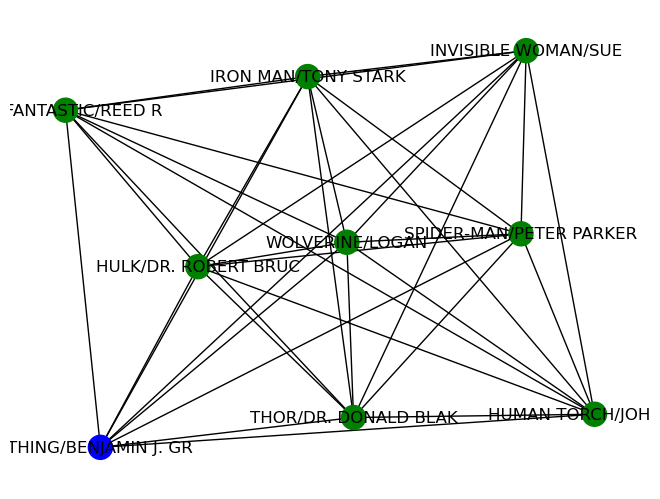

In [555]:
# plot the communities
color_map = []
for node in graph2:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green') 

nx.draw(graph2, node_color=color_map, with_labels=True)
plt.show()